#**Assignment 3**

In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import utils
from sklearn.preprocessing import LabelEncoder

import gzip
import csv
import os
import shutil
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib as mpl

##**Load Dataset**

In [2]:
!wget https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Personal_Care_Appliances_v1_00.tsv.gz

--2021-12-01 04:04:23--  https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Personal_Care_Appliances_v1_00.tsv.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.140.238
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.140.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17634794 (17M) [application/x-gzip]
Saving to: ‘amazon_reviews_us_Personal_Care_Appliances_v1_00.tsv.gz’

amazon_reviews_us_P 100%[===================>]  16.82M  14.6MB/s    in 1.2s    

2021-12-01 04:04:24 (14.6 MB/s) - ‘amazon_reviews_us_Personal_Care_Appliances_v1_00.tsv.gz’ saved [17634794/17634794]



##**Decompress File Dataset**

In [3]:
with gzip.open('amazon_reviews_us_Personal_Care_Appliances_v1_00.tsv.gz','rb') as f1:
  with open('amazon_reviews_us_Personal_Care_Appliances_v1_00.tsv','wb') as f2:
    shutil.copyfileobj(f1,f2)

#**Read Dataset**

In [5]:
data = pd.read_csv('amazon_reviews_us_Personal_Care_Appliances_v1_00.tsv',delimiter ='\t', error_bad_lines=False)

b'Skipping line 1598: expected 15 fields, saw 22\nSkipping line 25768: expected 15 fields, saw 22\n'


In [6]:
data.head(10)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,32114233,R1QX6706ZWJ1P5,B00OYRW4UE,223980852,Elite Sportz Exercise Sliders are Double Sided...,Personal_Care_Appliances,5,0,0,N,Y,Good quality. Shipped,Exactly as described. Good quality. Shipped fast,2015-08-31
1,US,18125776,R3QWMLJHIW6P37,B0000537JQ,819771537,Ezy Dose Weekly,Personal_Care_Appliances,5,0,0,N,Y,Five Stars,It is great,2015-08-31
2,US,19917519,R14Z1VR1N0Z9G6,B00HXXO332,849307176,"Pulse Oximeter, Blood Oxygen Monitor",Personal_Care_Appliances,5,1,1,N,Y,It's really nice it works great,It's really nice it works great. You have the ...,2015-08-31
3,US,18277171,R25ZRJL0GH0U0,B00EOB0JA2,700864740,SE Tools Tool Kit Watch Watch Repair Kit (20 P...,Personal_Care_Appliances,2,0,0,N,Y,Two Stars,The kit works fine... simple cheap plastic tho,2015-08-31
4,US,2593270,R3837KYH7AZNIY,B00OC2O1UC,794298839,"doTERRA HD Clear Facial Kit - Facial Lotion, F...",Personal_Care_Appliances,4,0,1,N,Y,Four Stars,It works better than anything else ive tried,2015-08-31
5,US,2592955,R2MN0QYCY6EVIV,B00HES9CMS,318730927,Viva Naturals #1 Best Selling Certified Organi...,Personal_Care_Appliances,5,0,0,N,Y,not bad at all,"I added to my oatmeal and protein shakes, not ...",2015-08-31
6,US,15168265,R3AN2UJ1D42ZS0,B0016BFR4G,887476137,Uncle Lee's Organic Green Tea -- 100 Tea Bags ...,Personal_Care_Appliances,5,0,0,N,Y,"Mild, enjoyable taste.",Husband drinks this green tea every morning an...,2015-08-31
7,US,13761624,R3U29ZLUWEEK4M,B00K504UUG,458706868,Syrtenty Electrodes - Multiple size and quanti...,Personal_Care_Appliances,5,0,0,N,Y,Five Stars,Good quality.,2015-08-31
8,US,37070734,R16ZDMJJHK796C,B00HES9CMS,318730927,Viva Naturals #1 Best Selling Certified Organi...,Personal_Care_Appliances,5,0,0,N,N,High Quality,This is high quality cacao powder. I would pur...,2015-08-31
9,US,29615023,RRRDOEJZD1Y22,B00P6TUO5G,170248843,"Viva Naturals Organic Non-GMO Cacao Powder, 2 ...",Personal_Care_Appliances,4,0,0,N,Y,we like it,Buying more products with health benefits in m...,2015-08-31


In [7]:
data1 = data.copy()
data1.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,32114233,R1QX6706ZWJ1P5,B00OYRW4UE,223980852,Elite Sportz Exercise Sliders are Double Sided...,Personal_Care_Appliances,5,0,0,N,Y,Good quality. Shipped,Exactly as described. Good quality. Shipped fast,2015-08-31
1,US,18125776,R3QWMLJHIW6P37,B0000537JQ,819771537,Ezy Dose Weekly,Personal_Care_Appliances,5,0,0,N,Y,Five Stars,It is great,2015-08-31
2,US,19917519,R14Z1VR1N0Z9G6,B00HXXO332,849307176,"Pulse Oximeter, Blood Oxygen Monitor",Personal_Care_Appliances,5,1,1,N,Y,It's really nice it works great,It's really nice it works great. You have the ...,2015-08-31
3,US,18277171,R25ZRJL0GH0U0,B00EOB0JA2,700864740,SE Tools Tool Kit Watch Watch Repair Kit (20 P...,Personal_Care_Appliances,2,0,0,N,Y,Two Stars,The kit works fine... simple cheap plastic tho,2015-08-31
4,US,2593270,R3837KYH7AZNIY,B00OC2O1UC,794298839,"doTERRA HD Clear Facial Kit - Facial Lotion, F...",Personal_Care_Appliances,4,0,1,N,Y,Four Stars,It works better than anything else ive tried,2015-08-31


In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85924 entries, 0 to 85923
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        85924 non-null  object
 1   customer_id        85924 non-null  int64 
 2   review_id          85924 non-null  object
 3   product_id         85924 non-null  object
 4   product_parent     85924 non-null  int64 
 5   product_title      85920 non-null  object
 6   product_category   85924 non-null  object
 7   star_rating        85924 non-null  int64 
 8   helpful_votes      85924 non-null  int64 
 9   total_votes        85924 non-null  int64 
 10  vine               85924 non-null  object
 11  verified_purchase  85924 non-null  object
 12  review_headline    85923 non-null  object
 13  review_body        85924 non-null  object
 14  review_date        85924 non-null  object
dtypes: int64(5), object(10)
memory usage: 9.8+ MB


##**Cleaning Dataset**

In [15]:
data1.dropna(inplace=True)
data1.drop_duplicates()
data1.shape
#Berdasarkan hasil cleaning, ada 5 data yang hilang

(85919, 15)

##**Splitting Dataset**

In [22]:
data1 = data1[:10000] 
datasplit = data1[['review_body','star_rating']]
datasplit.head()

,review_body,star_rating
0,Exactly as described. Good quality. Shipped fast,5
1,It is great,5
2,It's really nice it works great. You have the ...,5
3,The kit works fine... simple cheap plastic tho,2
4,It works better than anything else ive tried,4


In [23]:
datasplit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_body  10000 non-null  object
 1   star_rating  10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 234.4+ KB


In [25]:
star_rating = pd.DataFrame({'rating_value':datasplit['star_rating']})
star_rating.head()

,rating_value
0,5
1,5
2,5
3,2
4,4


##**Add Sentiment**


In [27]:
star_rating.loc[star_rating.rating_value>=3,'sentiment'] = 'positive'
star_rating.loc[star_rating.rating_value<3,'sentiment'] = 'negative'
star_rating

,rating_value,sentiment
0,5,positive
1,5,positive
2,5,positive
3,2,negative
4,4,positive
...,...,...
9995,5,positive
9996,5,positive
9997,5,positive
9998,3,positive


In [28]:
star_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rating_value  10000 non-null  int64 
 1   sentiment     10000 non-null  object
dtypes: int64(1), object(1)
memory usage: 234.4+ KB


In [30]:
object1=[star_rating.columns[index]for index, dtype in enumerate(star_rating.dtypes)if dtype =='object']
object1

['sentiment']

In [31]:
#cek keunikan data
for column in object1:
  print(f'{column}:{star_rating[column].unique()}')

sentiment:['positive' 'negative']


In [34]:
encoder = LabelEncoder()
for column in object1:
 star_rating[column]=encoder.fit_transform(star_rating[column])

star_rating.head()

,rating_value,sentiment
0,5,1
1,5,1
2,5,1
3,2,0
4,4,1


In [37]:
dataset1 = pd.concat([datasplit,star_rating],axis=1)
dataset1.drop(['star_rating','rating_value'],axis=1,inplace=True)
dataset1.head()

,review_body,sentiment
0,Exactly as described. Good quality. Shipped fast,1
1,It is great,1
2,It's really nice it works great. You have the ...,1
3,The kit works fine... simple cheap plastic tho,0
4,It works better than anything else ive tried,1


In [39]:
train, val, test = np.split(dataset1.sample(frac=1), [int(0.8*len(dataset1)), int(0.2*len(dataset1))])

In [40]:
def change_to_ds(df):
  labels = df.pop('sentiment')
  dataset1 = tf.data.Dataset.from_tensor_slices((df,labels))
  return dataset1


train_dataset = change_to_ds(train)
val_dataset = change_to_ds(val)
test_dataset = change_to_ds(test)

In [41]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [42]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [43]:
for example, label in train_dataset.take(1):
  print('text:',example.numpy())
  print('label:',label.numpy())

text: [[b'Delicious taste and smell wonderfu ltaste  just like lime.']
 [b"I'm new to shaving soaps, safety razors, etc. and this is my first shaving brush, so I don't have a good point of comparison. What I've observed with this brush is that, as a few other people have noted, a brownish colour bleeds into the shaving cream in the first few uses. Of course, I cleaned the brush before I used it. Also, I've been using the brush every day for a week and it's still losing a few hairs each shave. It's possible that I am being too aggressive with the brush though.<br /><br />If I am too aggressive, it's because the brush is quite soft and I am cursed with near-steel facial hair and sensitive skin. Getting the hair on my face to lift while trying to avoid overstimulating the skin on my face is a bit of a challenge with a brush as soft as this. That all said, the brush does its job and does not cause any discomfort.<br /><br />Overall, it's a nice brush compared to the brushes I was able to f

In [44]:
VOCAB_SIZE=1000
encoder= tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda review_body, label:review_body))

In [45]:
encoded_ex= encoder(example)[:3].numpy()
encoded_ex

array([[346, 164,   4, 236,   1,   1,  36,  33,   1,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

##**Function**

In [46]:
EPOCHS=8

In [47]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric],'')
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.legend([metric,'val'+ metric])

In [48]:
def loss_acc():
  test_loss, test_acc = model.evaluate(train_dataset)
  print('test loss :', test_loss)
  print('test acc :', test_acc)

In [49]:
def predictions(input_text):
  predictions = model.predict(np.array([input_text]))
  if predictions > 0:
    print ('Sentiment Positive')
  else:
    print('Sentiment Negative')    

In [50]:
def figure():
  plt.figure(figsize=(16, 8))
  plt.subplot(1, 2, 1)
  plot_graphs(history, 'accuracy')
  plt.ylim(None, 1)
  plt.subplot(1, 2, 2)
  plot_graphs(history, 'loss')
  plt.ylim(0, None)

##**Modeling**

In [51]:
model = tf.keras.Sequential([
                             encoder,
                             tf.keras.layers.Embedding( 
                                 input_dim= len(encoder.get_vocabulary()),
                                 output_dim=64,
                                 mask_zero=True
                             ),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1)

])

In [52]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [53]:
history = model.fit(train_dataset, epochs=EPOCHS,
                     validation_data=test_dataset,
                     validation_steps= 30,
                     verbose=1)

Epoch 1/8
125/125 [==============================] - 30s 149ms/step - loss: 0.6042 - accuracy: 0.2719 - val_loss: 0.4477 - val_accuracy: 0.6896
Epoch 2/8
125/125 [==============================] - 15s 123ms/step - loss: 0.4125 - accuracy: 0.7735 - val_loss: 0.3637 - val_accuracy: 0.8589
Epoch 3/8
125/125 [==============================] - 15s 123ms/step - loss: 0.3416 - accuracy: 0.8680 - val_loss: 0.2983 - val_accuracy: 0.8938
Epoch 4/8
125/125 [==============================] - 15s 123ms/step - loss: 0.2781 - accuracy: 0.8935 - val_loss: 0.2349 - val_accuracy: 0.9052
Epoch 5/8
125/125 [==============================] - 15s 121ms/step - loss: 0.2293 - accuracy: 0.9122 - val_loss: 0.1974 - val_accuracy: 0.9182
Epoch 6/8
125/125 [==============================] - 15s 120ms/step - loss: 0.1982 - accuracy: 0.9183 - val_loss: 0.1723 - val_accuracy: 0.9260
Epoch 7/8
125/125 [==============================] - 15s 121ms/step - loss: 0.1736 - accuracy: 0.9264 - val_loss: 0.1562 - val_accuracy:

In [54]:
loss_acc()

125/125 [==============================] - 5s 43ms/step - loss: 0.1498 - accuracy: 0.9352
test loss : 0.14976248145103455
test acc : 0.9352499842643738


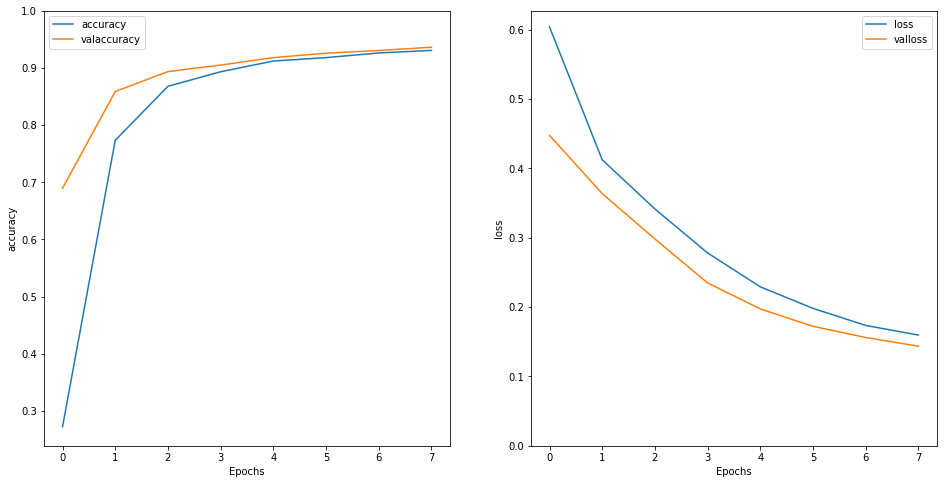

In [55]:
figure()

In [57]:
predictions('Amazing Product')

Sentiment Positive


In [66]:
predictions("Bad")

Sentiment Negative
